## Clustering 

#### Θελήσαμε να δούμε πως μπορούν να συσταδοποιηθούν τα δεδομένα μας όταν λαμβάνουμε υπόψην μόνο τα χαρακτηριστικά που αφορούν τις καταστροφές. Χρησιμοποιήσαμε τις στήλες 'deaths', 'damage', 'damage_crops', 'damage_property' εφαρμόζοντας PCA και DBSCAN. 

#### Πιο συγκεκριμένα, δημιουργήσαμε δυο διδιάστατα διανύσματα, το ένα με τις τιμές deaths-injuries και το άλλο με τις τιμές crops-property damage. Αφότου κανονικοποιήσαμε τις τιμές των διανυσμάτων (standard scaling) εφαρμόσαμε PCA για να μειώσουμε τις διαστάσεις από δυο σε μία. Έτσι καταλήξαμε με δυο διανύσματα, ένα που περιέχει την πληροφορία για deaths-injuries και το άλλο για crops-property damage. Ενώνοντας αυτά τα δυο διανύσματα λαμβάνουμε ένα σύνολο samples δυο χαρακτηριστικών (των προαναφερθέντων). Σε αυτά τα samples εφαρμόσαμε το DBSCAN αόλγριθμο. 

### Αλγόριθμος DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

#### O DBSCAN είναι αλγόριθμος συστδοποίησης που βασίζεται στην πυκνότητα των δεδομένων. Η πυκνότητα των δεδομένων σχετίζεται πολύ με τη διαστατικότητα, με την έννοια ότι όσο μεγαλώνουν οι διαστάσεις τα δεδομένα αραιώνουν στο χώρο και η εγγύτητα τους τείνει να γίνεται πιο ομοιόμορφη. Οι αλγόριθμοι που βασίζονται στην πυκνότητα λοιπόν εντοπίζουν περιοχές δεδομένων υψηλής πυκνότητας διαχωριζόμενες μεταξύ τους από περιοχές χαμηλής πυκνότητας.

https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d

#### • Λειτουργία

#### Ορίζεται μια ακτίνα εγγύτητας (epsilon) μεταξύ των σημείων (samples), και το ελάχιστον πλήθος γειτόνων n (min points). Με κέντρο ένα σημείο του dataset (αρχικά ένα τυχαίο) κάθε άλλο σημείο κατατάσσεται συγκριτικά με αυτό σε μια από τις εξής 3 κατηγορίες:
#### - (α) core point, μέσα στην περιοχή της ακτίνας epsilon
#### - (β) border point, στην περιφέρεια της ακτίνας epsilon
#### - (γ) noise point, έξω από αυτήν

#### Ο αλγόριθμος ξεκινάει ψάχνοντας να βρει τουλάχιστον n core ή border points. Αν δε βρεθούν τουλάχιστον n points, το αρχικό σημείο χαρακτηρίζεται ως θόρυβος. Αυτό βέβαια αργότερα μπορεί να αλλάξει, καθώς μπορεί να βρεθεί στη γειτονιά (γείτονας = core/border point) ενός άλλου σημείου που υπάρχει σε cluster. O DBSCAN δρα επαναληπτικά συνεχίζοντας κάθε φορά με ένα σημείο το οποίο δεν έχει επισκεφθεί (ορίσει ως κέντρο). 
#### Όσο εκτελείται ο αλγόριθμος αυξάνονται οι διαστάσεις των clusters, καθώς κάθε σημείο του cluster έχει τη δυνατότητα να το επεκτείνει βρίσκοντας νέους γείτονες.  τις διαστάσεις τους, καθώς ο αλγόριθμος επαναλαμβάνει αυτή τη διαδικασία μέσα σε κάθε cluster, δηλαδή πηγαίνει σε κάθε core και border point και βρίσκει καινούριους γείτονες.  
#### H διαδικασία τερματίζει όταν κανένα σημείο από τα υπολοιπόμενα δεν μπορεί να μπει σε κάποιο cluster.  Να σημειωθεί ότι δεν υπάρχει με αυτόν τον τρόπο αλληλεπικάλυψη των clusters, δηλαδή κάθε σημείο ανήκει σε ένα και μόνο ένα cluster.


####  • Επιλογή παραμέτρων

#### Δύο είναι οι σημαντικές παράμετροι που πρέπει να οριστούν με πολλή προσοχή στο DBSCAN, καθώς μικρές αλλαγές σε αυτούς οδηγούν σε έντονες διαφοροποιήσεις στα αποτελέσματα. Συγκεκριμένα, το epsilon και το min samples. 
#### Epsilon: η ακτίνα μέσα στην οποία ψάχνουμε σημεία γύρω από ένα σημείο Ρ. 
#### Min points: το ελάχιστο πλήθος σημείων που πρέπει να βρεθούν στην epsilon-γειτονιά ενός σημείου Ρ. 


#### Θα εξηγήσουμε στη συνέχεια πως επιλέγουμε αυτές τις παραμέτρους. Αρχικά πάμε να δημιουργήσουμε το dataframe με το οποίο θα δουλέψουμε το clustering. 


#### Επιλέγουμε τα χαρακτηριστικά tor_length, tor_width, deaths, injuries, damage_crops, damage_property, θεωρώντας πως η αυξομείωση των τιμών τους συμβαίνει σε γενικές γραμμές ταυτόχρονα και άρα θα μπορούν να σχηματίσουν clusters. To dataframe που παίρνουμε είναι το df_cl


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import sklearn


df = pd.read_csv('./preprocessed_data.csv', low_memory=False)
df3 = df

In [2]:
tmp4 = df3.loc[(df3['tor_length']!=0)&(~df3['tor_length'].isna())
               &(df3['tor_width']!=0)&(~df3['tor_width'].isna())&
              (~df3['deaths'].isna())&(~df3['injuries'].isna())
              &(~df3['damage_crops'].isna())&(~df3['damage_property'].isna())&
              (df3['deaths']!='NaN')&(df3['injuries']!='NaN')&
              (df3['damage_crops']!='NaN')&(df3['damage_property']!='NaN')]

#(df3['deaths']!=0)&(df3['injuries']!=0)

c:\users\mariliatmf\anaconda3\envs\py37\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [3]:
# create the data frame for clustering
df_cl = pd.DataFrame()
#df_cl['tor_width'] = tmp4['tor_width']
#df_cl['tor_length'] = tmp4['tor_length']
df_cl['deaths'] = tmp4['deaths']
df_cl['injuries'] = tmp4['injuries']
df_cl['damage_crops'] = tmp4['damage_crops']
df_cl['damage_property'] = tmp4['damage_property']


# change the index
indx=list(range(len(df_cl)))
df_cl['index'] = indx
df_cl.set_index('index', inplace = True)
df_cl[:5]



,deaths,injuries,damage_crops,damage_property
index,,,,
0,0,0,1696.469742,1696.469742
1,0,0,0.000000,0.000000
2,0,0,0.000000,848234.871074
3,0,0,0.000000,101788.184529
4,0,0,84.823487,0.000000


#### Για να οπτικοποιήσουμε φυσικά το clustering θα πρέπει να μειώσουμε τη διάσταση των δεδομένων μας σε 2 ή 3. Θα εφαρμόσουμε PCA για να μειώσουμε τις διαστάσεις σε 2. Πριν από το PCA ωστόσο θα κάνουμε scaling των δεδομένων. Θα χρησιμοποιήσουμε και το min_max και το standard scaling. 
#### To min-max κάνει scaling μετασχηματίζει τις τιμές έτσι ώστε να είναι στο διάστημα (0,1) (default, μπορεί να αλλαχθεί στη συνάρτηση του sklearn.
#### To standard scaling αφαιρεί το μέσο όρο και διαιρεί με την τυπική απόκλιση, καταλήγοντας έτσι τα δεδομένα να έχουν μέση τιμή 0 και τυπική απόκλιση τη μονάδα.

#### min-max scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#### standard scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### Μέτρηση της απόδοσης του DBSCAN

#### Για τη μέτρηση του performance του αλγοιρίθμου θα χρησιμοποιήσουμε το  Silhouette Score. Το Silhouette Score υπολογίζεται χρησιμοποιντας τη μέση τιμή των αποστάσεων των σημείων μέσα στα clusters, και τη μέση τιμή των αποστάσεων μεταξύ των clusters (το κάθε ένα με το κοντινότερό του). Έτσι, ένα cluster με μεγάλη πυκνότητα, δηλαδή μικρές αποστάσεις των μεταξύ των σημείων, και μεγάλη απόσταστη από το πλησιέστερό του cluster, παρουσιάζει 'μοναδικότητα', κι έχει μεγάλο Silhouette Score. 
#### Γενικά, το σκορ κινέιται στο διάστημα (-1,1) με -1 να είναι το χειρότερο σκορ και +1 το καλύτερο.

https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

## Using standard scaler

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_cl)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3', 'x4'])

X = np.array(scaled_df)

pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)
X_pca = pd.DataFrame(data = principalComponents1
             , columns = ['x1', 'x2'])


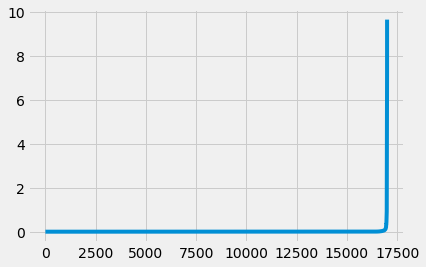

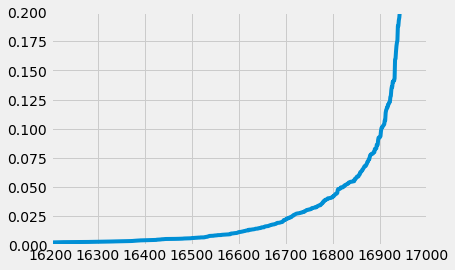

In [5]:
# Για να βρούμε το καταλληλο ε για το dbscan

from sklearn.neighbors import NearestNeighbors

data1 = X_pca.sample(17000)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data1)
distances, indices = nbrs.kneighbors(data1)

with plt.style.context('fivethirtyeight'):

    distances = np.sort(distances, axis=0)
    distances = distances[:,1]

    plt.plot(distances)
plt.show()

with plt.style.context('fivethirtyeight'):

    plt.ylim((0,0.2))
    plt.xlim((16200,17000))
    plt.plot(distances)
plt.show()

[-1  0]


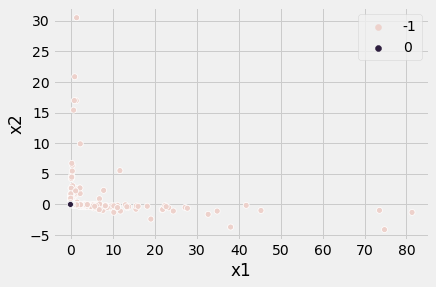

 0    15657
-1     1343
dtype: int64


In [6]:
import sklearn
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 0.04, min_samples = 500).fit(data1)
print(pd.Series(dbsc.labels_).unique())
labels = dbsc.labels_

with plt.style.context('fivethirtyeight'):
    ax = sns.scatterplot(data1["x1"],data1["x2"],data=data1, hue=dbsc.labels_)
plt.show()

print(pd.Series(labels).value_counts())

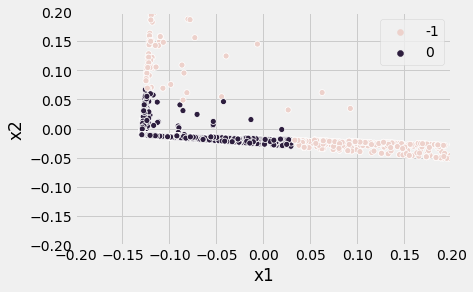

 0    15657
-1     1343
dtype: int64


In [7]:
import sklearn
from sklearn.cluster import DBSCAN

with plt.style.context('fivethirtyeight'):
    ax = sns.scatterplot(data1["x1"],data1["x2"],data=data1, hue=dbsc.labels_)
    ax.set(xlim=(-.2, .2))
    ax.set(ylim=(-.2, .2))
plt.show()
print(pd.Series(labels).value_counts())

In [8]:
# measuring the DBSC performance
#https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818

from sklearn.metrics import silhouette_score
import sklearn

print('Silhouette Score: ', sklearn.metrics.silhouette_score(data1, dbsc.labels_), 'indicates a very good performance of DBSCAN')

# τεινει στο 1 που υποδεικνύει πολύ καλό performance

Silhouette Score:  0.8688791552945286 indicates a very good performance of DBSCAN
